**Dataset Description :**

US ACCIDENTS (2016-2023)
This is a countrywide car accident dataset that covers 49 states of the USA. The accident data were collected from February 2016 to March 2023, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by various entities, including the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road networks.

Data set is the sampled version of the original 77mill records data

**ROWS:** 3,96,130

**COLUMNS :**  46

**TOTAL RECORD**: 1,82,21,980

**Questiones to be answered from the dataset:**

1. **Severity Prediction**: Can we predict the
severity of a car accident based on weather conditions, road features (like junctions, traffic signals), and location details (latitude, longitude)?

2. **Accident Hotspot Detection**: Can we use clustering techniques to identify geographical hotspots for accidents across different states or counties?


3. **Weather Impact Analysis**: How does weather (temperature, humidity, wind speed, precipitation) affect the frequency and severity of accidents?

4. **Time of Day and Accident Severity:** Can we predict accident severity based on the time of day (using columns like Start_Time, Sunrise_Sunset, Twilight phases)?

5. Traffic Signal and Accident Likelihood: How much do traffic signals or other road features (e.g., crossings, junctions) contribute to accident likelihood and severity?

6. **Time-Series Forecasting of Accidents:** Can we build a time-series model to forecast the number of accidents in different regions based on historical trends?

7. **Accident Probability Near Airports:** Does the proximity to airports (using the Airport_Code attribute) increase or decrease the likelihood of accidents?

8. **Impact of Urban vs. Rural Areas on Accidents:** Can we differentiate the accident characteristics between urban and rural areas (city, county, street level data)?

9. **Predicting Delays Caused by Accidents:** Can a machine learning model predict
how long traffic delays will last after an accident, based on historical data, traffic conditions, and weather?

10. **Optimizing Emergency Response Deployment:** Can a model optimize emergency response deployment by predicting the accident-prone times and locations to station emergency services?

11. Classification of Accident Descriptions for Automatic Reporting: Can natural language processing (NLP) be applied to classify and summarize accident descriptions for automatic report generation?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
mlproj=pd.read_csv("/content/US_Accidents_March23_sampled_500k.csv")

In [6]:
mlproj.head(10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,False,False,Night,Night,Night,Night
5,A-1101469,Source2,2,2021-03-29 07:03:58,2021-03-29 08:51:01,42.532082,-70.944267,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
6,A-7222249,Source1,2,2020-01-14 16:49:23,2020-01-14 20:49:23,42.421280,-123.119450,42.421280,-123.119450,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-6198239,Source1,2,2021-08-13 16:48:00.000000000,2021-08-13 19:09:09.000000000,30.191010,-85.682508,30.190329,-85.682530,0.047,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-4222549,Source1,2,2022-10-12 13:59:30,2022-10-12 15:33:53,32.868947,-96.804018,32.869500,-96.804014,0.038,...,False,True,False,False,False,False,Day,Day,Day,Day
9,A-5924038,Source1,2,2021-10-21 07:39:30,2021-10-21 09:24:30,39.717218,-86.124691,39.733478,-86.137021,1.301,...,False,False,False,False,False,False,Night,Day,Day,Day


In [7]:
mlproj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279623 non-null  float64
 8   End_Lng                279623 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            499999 non-null  object 
 11  Street                 499309 non-null  object 
 12  City                   499981 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

In [8]:
mlproj.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,500000.000000,500000.000000,500000.000000,279623.000000,279623.000000,500000.000000,489534.000000,370983.000000,488870.000000,491072.000000,488709.000000,463013.000000,357384.000000
mean,2.212748,36.206421,-94.736583,36.273192,-95.776553,0.564317,61.646254,58.229028,64.834921,29.536621,9.091540,7.681347,0.008289
std,0.486661,5.071411,17.405761,5.265333,18.120211,1.774872,19.000133,22.352246,22.826158,1.008666,2.708083,5.431361,0.101865
min,1.000000,24.562117,-124.497420,24.570110,-124.497419,0.000000,-77.800000,-53.200000,1.000000,0.120000,0.000000,0.000000,0.000000
25%,2.000000,33.416823,-117.233047,33.474773,-117.778324,0.000000,49.000000,43.000000,48.000000,29.370000,10.000000,4.600000,0.000000
50%,2.000000,35.832147,-87.794365,36.192669,-88.039013,0.029000,64.000000,62.000000,67.000000,29.860000,10.000000,7.000000,0.000000
75%,2.000000,40.082443,-80.359601,40.181341,-80.252449,0.465000,76.000000,75.000000,84.000000,30.030000,10.000000,10.400000,0.000000
max,4.000000,48.999569,-67.484130,48.998901,-67.484130,193.479996,207.000000,207.000000,100.000000,38.440000,130.000000,822.800000,10.130000


In [10]:
mlproj.shape

(500000, 46)

## Data Cleaning

### Removing Unwanted Columns

Unwanted Columns After Observation :




1. ID
2. Source
3. End_Lat
4. End_Lng
5. Description
6. Street
7. Country
8. Airport_Code
9. Wind_Chill(F)
10. Civil_Twilight
11. Nautical_Twilight
12. Astronomical_Twilight

In [11]:
Unwated_Columns=['ID','Source','End_Lat','End_Lng','Street','Country','Airport_Code','Wind_Chill(F)','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']

In [12]:
mlproj_clean=mlproj.copy()

In [13]:
mlproj_clean.head(10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,False,False,Night,Night,Night,Night
5,A-1101469,Source2,2,2021-03-29 07:03:58,2021-03-29 08:51:01,42.532082,-70.944267,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
6,A-7222249,Source1,2,2020-01-14 16:49:23,2020-01-14 20:49:23,42.421280,-123.119450,42.421280,-123.119450,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-6198239,Source1,2,2021-08-13 16:48:00.000000000,2021-08-13 19:09:09.000000000,30.191010,-85.682508,30.190329,-85.682530,0.047,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-4222549,Source1,2,2022-10-12 13:59:30,2022-10-12 15:33:53,32.868947,-96.804018,32.869500,-96.804014,0.038,...,False,True,False,False,False,False,Day,Day,Day,Day
9,A-5924038,Source1,2,2021-10-21 07:39:30,2021-10-21 09:24:30,39.717218,-86.124691,39.733478,-86.137021,1.301,...,False,False,False,False,False,False,Night,Day,Day,Day


In [14]:
mlproj_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279623 non-null  float64
 8   End_Lng                279623 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            499999 non-null  object 
 11  Street                 499309 non-null  object 
 12  City                   499981 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

In [15]:
#Dropping Unwanted Columns
mlproj_clean=mlproj_clean.drop(columns=Unwated_Columns)

In [16]:
mlproj_clean.shape

(500000, 35)

In [17]:
mlproj_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           500000 non-null  int64  
 1   Start_Time         500000 non-null  object 
 2   End_Time           500000 non-null  object 
 3   Start_Lat          500000 non-null  float64
 4   Start_Lng          500000 non-null  float64
 5   Distance(mi)       500000 non-null  float64
 6   Description        499999 non-null  object 
 7   City               499981 non-null  object 
 8   County             500000 non-null  object 
 9   State              500000 non-null  object 
 10  Zipcode            499884 non-null  object 
 11  Timezone           499493 non-null  object 
 12  Weather_Timestamp  492326 non-null  object 
 13  Temperature(F)     489534 non-null  float64
 14  Humidity(%)        488870 non-null  float64
 15  Pressure(in)       491072 non-null  float64
 16  Vi

In [18]:
#Converting Start_time and End_time Data to Valid datetime format
mlproj_clean['Start_Time'] = pd.to_datetime(mlproj_clean['Start_Time'], errors='coerce')
mlproj_clean['End_Time'] = pd.to_datetime(mlproj_clean['End_Time'], errors='coerce')

In [19]:
start_time_nat_count = mlproj_clean['Start_Time'].isna().sum()
end_time_nat_count = mlproj_clean['End_Time'].isna().sum()

# Display the counts
print(f"Number of NaT in Start_Time: {start_time_nat_count}")
print(f"Number of NaT in End_Time: {end_time_nat_count}")

Number of NaT in Start_Time: 48163
Number of NaT in End_Time: 48163


In [20]:
mlproj_T1=mlproj_clean.copy()

In [21]:
#Removing the Rows with Invalid Time stamp
mlproj_T1=mlproj_T1.dropna(subset=['Start_Time', 'End_Time'])

In [22]:
mlproj_T1.shape

(451837, 35)

In [23]:
mlproj_T1_cleaned = mlproj_T1.reset_index(drop=True)

In [24]:
mlproj_T1_cleaned.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,City,County,State,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,0.000,Accident on LA-19 Baker-Zachary Hwy at Lower Z...,Zachary,East Baton Rouge,LA,...,False,False,False,False,False,False,False,True,False,Day
1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,1.054,Incident on I-90 EB near REST AREA Drive with ...,Austin,Mower,MN,...,False,False,False,False,False,False,False,False,False,Day
2,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,0.046,RP ADV THEY LOCATED SUSP VEH OF 20002 - 726 CR...,Bakersfield,Kern,CA,...,False,False,False,False,False,False,False,False,False,Night
3,2,2021-03-29 07:03:58,2021-03-29 08:51:01,42.532082,-70.944267,0.000,Accident on Forest St at Lowell St.,Peabody,Essex,MA,...,False,False,False,False,False,False,False,True,False,Day
4,2,2020-01-14 16:49:23,2020-01-14 20:49:23,42.421280,-123.119450,0.000,At OR-99/Exit 45A - Accident.,Gold Hill,Jackson,OR,...,False,False,False,False,False,False,False,False,False,Day


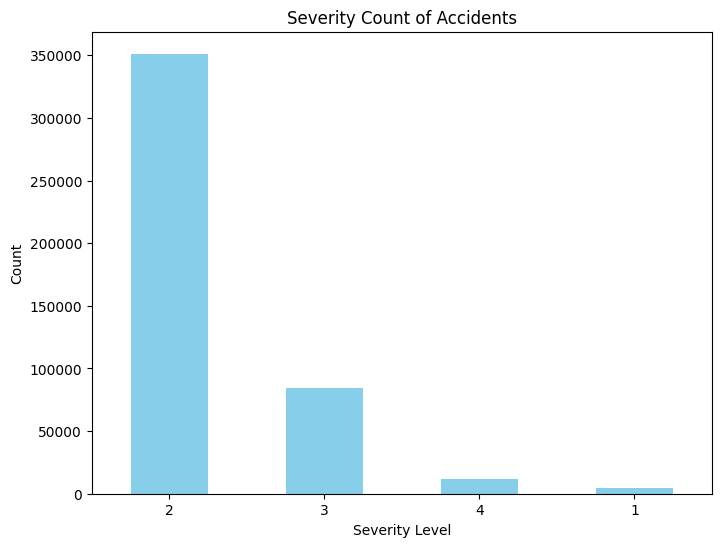

In [25]:
severity_counts = mlproj_T1_cleaned['Severity'].value_counts()
plt.figure(figsize=(8, 6))
severity_counts.plot(kind='bar', color='skyblue')
plt.title('Severity Count of Accidents')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [26]:
mlproj_T1_cleaned['Date'] = pd.to_datetime(mlproj_T1_cleaned['Start_Time']).dt.date

# Step 2: Remove the date part from 'Start_Time' and 'End_Time', keeping only the time
mlproj_T1_cleaned['Start_Time'] = pd.to_datetime(mlproj_T1_cleaned['Start_Time']).dt.time
mlproj_T1_cleaned['End_Time'] = pd.to_datetime(mlproj_T1_cleaned['End_Time']).dt.time


In [27]:
# Move 'Date' before 'Start_Time'
cols = list(mlproj_T1_cleaned.columns)
cols.insert(cols.index('Start_Time'), cols.pop(cols.index('Date')))

# Reassign the DataFrame with the new column order
mlproj_T1_cleaned = mlproj_T1_cleaned[cols]

In [28]:
mlproj_T1_cleaned.head()

,Severity,Date,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,City,County,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,2,2019-06-12,10:10:56,10:55:58,30.641211,-91.153481,0.000,Accident on LA-19 Baker-Zachary Hwy at Lower Z...,Zachary,East Baton Rouge,...,False,False,False,False,False,False,False,True,False,Day
1,2,2022-02-21,17:43:04,19:43:23,43.680592,-92.993317,1.054,Incident on I-90 EB near REST AREA Drive with ...,Austin,Mower,...,False,False,False,False,False,False,False,False,False,Day
2,2,2020-12-04,01:46:00,04:13:09,35.395484,-118.985176,0.046,RP ADV THEY LOCATED SUSP VEH OF 20002 - 726 CR...,Bakersfield,Kern,...,False,False,False,False,False,False,False,False,False,Night
3,2,2021-03-29,07:03:58,08:51:01,42.532082,-70.944267,0.000,Accident on Forest St at Lowell St.,Peabody,Essex,...,False,False,False,False,False,False,False,True,False,Day
4,2,2020-01-14,16:49:23,20:49:23,42.421280,-123.119450,0.000,At OR-99/Exit 45A - Accident.,Gold Hill,Jackson,...,False,False,False,False,False,False,False,False,False,Day


In [29]:
mlproj_T1_cleaned = mlproj_T1_cleaned.sort_values(by='Date', ascending=True)

# Reset the index after sorting (optional)
mlproj_T1_cleaned = mlproj_T1_cleaned.reset_index(drop=True)

In [30]:
mlproj_T1_cleaned.head()

,Severity,Date,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,City,County,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,4,2016-01-14,20:18:33,13:25:19,40.630609,-75.470606,0.061,Closed at Fullerton Ave - Road closed due to a...,Whitehall,Lehigh,...,False,False,False,False,False,False,False,False,False,Night
1,4,2016-01-14,20:18:33,23:22:00,40.630609,-75.470606,0.061,Closed at Fullerton Ave - Road closed due to a...,Whitehall,Lehigh,...,False,False,False,False,False,False,False,False,False,Night
2,3,2016-02-08,00:37:08,06:37:08,40.108910,-83.092860,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,Dublin,Franklin,...,False,False,False,False,False,False,False,False,False,Night
3,2,2016-02-09,06:46:32,12:46:32,39.152670,-84.539500,0.361,At I-74/US-52/US-27/Exit 4 - Accident.,Cincinnati,Hamilton,...,False,False,False,False,False,False,False,False,False,Night
4,2,2016-02-09,08:12:44,08:42:44,39.570904,-84.251724,0.010,Accident on County Hwy-119 Clearcreek Rd near ...,Springboro,Warren,...,False,False,False,False,False,False,False,False,False,Day


In [31]:
duplicates_exist = mlproj_T1_cleaned.duplicated().sum()

# Display the number of duplicate rows
print(f"Number of duplicate rows: {duplicates_exist}")

Number of duplicate rows: 430


In [32]:
duplicate_rows = mlproj_T1_cleaned[mlproj_T1_cleaned.duplicated(keep=False)]

# Print the duplicate rows
duplicate_rows

,Severity,Date,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,City,County,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
11567,2,2016-09-02,09:42:30,15:42:30,34.030770,-81.119250,0.000,At Rockland Rd - Accident.,Columbia,Richland,...,False,False,False,False,False,False,False,False,False,Day
11597,2,2016-09-02,09:42:30,15:42:30,34.030770,-81.119250,0.000,At Rockland Rd - Accident.,Columbia,Richland,...,False,False,False,False,False,False,False,False,False,Day
12837,2,2016-09-13,11:46:24,17:46:24,29.642120,-95.368240,0.000,At outh Acres Dr - Accident.,Houston,Harris,...,False,False,False,False,False,False,False,False,False,Day
12885,2,2016-09-13,11:46:24,17:46:24,29.642120,-95.368240,0.000,At outh Acres Dr - Accident.,Houston,Harris,...,False,False,False,False,False,False,False,False,False,Day
17291,2,2016-10-20,07:31:24,13:31:24,30.112780,-97.785230,0.000,At Bradshaw Rd - Accident.,Buda,Travis,...,False,False,False,False,False,False,False,False,False,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431475,2,2022-11-17,19:56:00,21:13:58,37.015689,-122.034616,0.016,Incident on GRAHAM HILL RD near TREETOP DR Exp...,Santa Cruz,Santa Cruz,...,False,False,False,False,False,False,False,False,False,Night
433278,2,2022-12-01,18:24:00,00:00:00,32.014685,-102.210459,2.005,Incident on TX-158 WB near TX-349 Road closed....,Midland,Midland,...,False,False,False,False,False,False,False,False,False,Night
433295,2,2022-12-01,18:24:00,00:00:00,32.014685,-102.210459,2.005,Incident on TX-158 WB near TX-349 Road closed....,Midland,Midland,...,False,False,False,False,False,False,False,False,False,Night
446386,2,2023-01-25,10:02:41,12:55:48,34.946250,-82.071336,1.193,Incident on I-85 SB near EXIT 66 Expect long d...,Wellford,Spartanburg,...,False,False,False,False,False,False,False,False,False,Day


In [33]:
mlproj_T1_cleaned = mlproj_T1_cleaned.drop_duplicates(keep='first')

# Reset the index after removing duplicates (optional)
mlproj_T1_cleaned = mlproj_T1_cleaned.reset_index(drop=True)

In [34]:
mlproj_T1_cleaned.shape

(451407, 36)

In [35]:
mlproj_T1_cleaned.head()

,Severity,Date,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,City,County,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,4,2016-01-14,20:18:33,13:25:19,40.630609,-75.470606,0.061,Closed at Fullerton Ave - Road closed due to a...,Whitehall,Lehigh,...,False,False,False,False,False,False,False,False,False,Night
1,4,2016-01-14,20:18:33,23:22:00,40.630609,-75.470606,0.061,Closed at Fullerton Ave - Road closed due to a...,Whitehall,Lehigh,...,False,False,False,False,False,False,False,False,False,Night
2,3,2016-02-08,00:37:08,06:37:08,40.108910,-83.092860,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,Dublin,Franklin,...,False,False,False,False,False,False,False,False,False,Night
3,2,2016-02-09,06:46:32,12:46:32,39.152670,-84.539500,0.361,At I-74/US-52/US-27/Exit 4 - Accident.,Cincinnati,Hamilton,...,False,False,False,False,False,False,False,False,False,Night
4,2,2016-02-09,08:12:44,08:42:44,39.570904,-84.251724,0.010,Accident on County Hwy-119 Clearcreek Rd near ...,Springboro,Warren,...,False,False,False,False,False,False,False,False,False,Day


In [36]:
mlproj_T1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451407 entries, 0 to 451406
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           451407 non-null  int64  
 1   Date               451407 non-null  object 
 2   Start_Time         451407 non-null  object 
 3   End_Time           451407 non-null  object 
 4   Start_Lat          451407 non-null  float64
 5   Start_Lng          451407 non-null  float64
 6   Distance(mi)       451407 non-null  float64
 7   Description        451406 non-null  object 
 8   City               451392 non-null  object 
 9   County             451407 non-null  object 
 10  State              451407 non-null  object 
 11  Zipcode            451304 non-null  object 
 12  Timezone           450964 non-null  object 
 13  Weather_Timestamp  444653 non-null  object 
 14  Temperature(F)     442109 non-null  float64
 15  Humidity(%)        441508 non-null  float64
 16  Pr

In [37]:
# 'Weather_Timestamp' is in datetime format
mlproj_T1_cleaned['Weather_Timestamp'] = pd.to_datetime(mlproj_T1_cleaned['Weather_Timestamp'], errors='coerce')
mlproj_T1_cleaned['Weather_Timestamp'] = mlproj_T1_cleaned['Weather_Timestamp'].dt.time

In [38]:
mlproj_T1_cleaned["Weather_Timestamp"]

,Weather_Timestamp
0,19:51:00
1,19:51:00
2,00:53:00
3,06:53:00
4,08:14:00
...,...
451402,13:35:00
451403,22:55:00
451404,22:35:00
451405,18:00:00


In [39]:
mlproj_T1_cleaned.head()

,Severity,Date,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,City,County,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,4,2016-01-14,20:18:33,13:25:19,40.630609,-75.470606,0.061,Closed at Fullerton Ave - Road closed due to a...,Whitehall,Lehigh,...,False,False,False,False,False,False,False,False,False,Night
1,4,2016-01-14,20:18:33,23:22:00,40.630609,-75.470606,0.061,Closed at Fullerton Ave - Road closed due to a...,Whitehall,Lehigh,...,False,False,False,False,False,False,False,False,False,Night
2,3,2016-02-08,00:37:08,06:37:08,40.108910,-83.092860,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,Dublin,Franklin,...,False,False,False,False,False,False,False,False,False,Night
3,2,2016-02-09,06:46:32,12:46:32,39.152670,-84.539500,0.361,At I-74/US-52/US-27/Exit 4 - Accident.,Cincinnati,Hamilton,...,False,False,False,False,False,False,False,False,False,Night
4,2,2016-02-09,08:12:44,08:42:44,39.570904,-84.251724,0.010,Accident on County Hwy-119 Clearcreek Rd near ...,Springboro,Warren,...,False,False,False,False,False,False,False,False,False,Day


In [40]:
mlproj_T1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451407 entries, 0 to 451406
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           451407 non-null  int64  
 1   Date               451407 non-null  object 
 2   Start_Time         451407 non-null  object 
 3   End_Time           451407 non-null  object 
 4   Start_Lat          451407 non-null  float64
 5   Start_Lng          451407 non-null  float64
 6   Distance(mi)       451407 non-null  float64
 7   Description        451406 non-null  object 
 8   City               451392 non-null  object 
 9   County             451407 non-null  object 
 10  State              451407 non-null  object 
 11  Zipcode            451304 non-null  object 
 12  Timezone           450964 non-null  object 
 13  Weather_Timestamp  444653 non-null  object 
 14  Temperature(F)     442109 non-null  float64
 15  Humidity(%)        441508 non-null  float64
 16  Pr

In [41]:
mlproj_T1_cleaned.isnull().sum()

,0
Severity,0
Date,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
Description,1
City,15
County,0


In [42]:
mlproj_2=mlproj_T1_cleaned.copy()

In [43]:
mlproj_2.to_csv("mlproj_trail.csv")

In [44]:
mlproj_2=mlproj_2.dropna(thresh=len(mlproj_2.columns) - 2)

In [45]:
mlproj_2.shape

(441458, 36)

In [46]:
mlproj_T1_cleaned.shape

(451407, 36)

In [47]:
mlproj_2.isnull().sum()

,0
Severity,0
Date,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
Description,1
City,13
County,0


In [48]:
#Clearning out NULL and missing values in each columns
null_description_rows = mlproj_2[mlproj_2['Description'].isnull()]
null_description_rows

,Severity,Date,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,City,County,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
143595,3,2019-03-20,17:20:14,18:48:38,29.776676,-95.38855,0.0,NaN,Houston,Harris,...,False,False,False,False,False,False,False,False,False,Day


In [49]:
#Removed Values in Description Column
mlproj_2 = mlproj_2.dropna(subset=['Description'])

In [50]:
#City
mlproj_2[mlproj_2['City'].isnull()]

,Severity,Date,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,City,County,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
7971,3,2016-08-02,20:48:22,02:48:22,27.388760,-82.449556,0.000,At I-75 - Accident.,NaN,Sarasota,...,False,False,False,False,False,False,False,False,False,NaN
186421,2,2019-12-03,22:48:13,00:01:27,38.965710,-77.002457,0.000,Accident on New Hampshire Ave at Eastern Ave.,NaN,District of Columbia,...,False,False,False,False,False,False,False,True,False,NaN
208766,2,2020-03-26,17:54:08,18:09:08,38.965710,-77.002460,0.000,At N Capitol St - Accident.,NaN,District of Columbia,...,False,False,False,False,False,False,False,True,False,NaN
210730,4,2020-04-08,21:11:21,21:40:31,38.832110,-76.987320,0.127,Closed at Owens Rd - Road closed due to accident.,NaN,District of Columbia,...,False,False,False,False,False,False,False,False,False,NaN
226918,2,2020-06-29,07:20:25,07:49:51,38.832111,-76.987320,0.000,Accident on Southern Ave at Wheeler Rd.,NaN,District of Columbia,...,False,False,False,False,False,False,False,False,False,NaN
243846,2,2020-10-28,19:35:30,23:09:00,38.912285,-76.934168,0.930,Stationary traffic on DC-295 from Eastern Ave ...,NaN,District of Columbia,...,False,False,False,False,False,False,False,False,False,NaN
249704,2,2020-11-12,15:55:38,17:25:38,38.912285,-76.934168,0.192,Incident on KENILWORTH AVE SB near EASTERN AVE...,NaN,District of Columbia,...,False,False,False,False,False,False,False,False,False,NaN
314285,2,2021-07-21,07:17:30,09:35:01,38.822064,-77.000247,0.111,Slow traffic on MD-210 from 6th St SE to Oxon ...,NaN,District of Columbia,...,False,False,False,False,False,False,False,False,False,NaN
324159,2,2021-09-01,14:00:29,15:17:06,34.986822,-85.049536,0.179,Incident on QUAIL VALLEY TRL near LONDON LN Ex...,NaN,Hamilton,...,False,False,False,False,False,False,False,False,False,NaN
341539,2,2021-11-06,18:15:00,18:53:00,38.912189,-76.934045,0.515,Slow traffic on MD-295 N - MD-201 N from Easte...,NaN,District of Columbia,...,False,False,False,False,False,False,False,False,False,NaN


In [51]:
#Filling the missing values in City based on the values of County and State
mlproj_2['City'] = mlproj_2.groupby(['County', 'State'])['City'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None))

In [52]:
mlproj_2.isnull().sum()

,0
Severity,0
Date,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
Description,0
City,0
County,0


In [53]:
#Filling the missing values in Sunrise_Sunset column based on the start time value
def classify_sunrise_sunset(row):
    if pd.isna(row['Sunrise_Sunset']):
        hour = row['Start_Time'].hour
        if 6 <= hour < 18:  # Assuming 6 AM to 6 PM is 'Day'
            return 'Day'
        else:
            return 'Night'
    else:
        return row['Sunrise_Sunset']

In [54]:
mlproj_2['Sunrise_Sunset'] = mlproj_2.apply(classify_sunrise_sunset, axis=1)

In [55]:
mlproj_2['Sunrise_Sunset'].isnull().sum()

0

In [56]:
missing_value=mlproj_2[(mlproj_2['Start_Lat'] == 27.388760) & (mlproj_2['Start_Lng'] == -82.449556)]
missing_value

,Severity,Date,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,City,County,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
7971,3,2016-08-02,20:48:22,02:48:22,27.38876,-82.449556,0.0,At I-75 - Accident.,Sarasota,Sarasota,...,False,False,False,False,False,False,False,False,False,Night


In [57]:
mlproj_2.isnull().sum()

,0
Severity,0
Date,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
Description,0
City,0
County,0


In [58]:
columns_with_nulls = [
    'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
    'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition'
]

# Find rows with null values in any of these columns
rows_with_nulls = mlproj_2[mlproj_2[columns_with_nulls].isnull().any(axis=1)]

# Display the filtered rows
rows_with_nulls[columns_with_nulls]

,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition
5,23.0,93.0,29.63,2.5,WSW,11.5,NaN,Light Snow
8,19.4,86.0,29.82,3.0,WNW,16.1,NaN,Light Snow
9,14.0,93.0,29.89,7.0,West,15.0,NaN,Light Snow
10,17.6,79.0,29.87,3.0,West,11.5,NaN,Haze
11,19.4,74.0,29.84,3.0,SW,12.7,NaN,Overcast
...,...,...,...,...,...,...,...,...
451263,50.0,76.0,30.01,10.0,NNE,5.0,NaN,Partly Cloudy
451275,43.0,93.0,28.87,10.0,CALM,0.0,NaN,Cloudy
451319,57.0,38.0,28.90,10.0,CALM,0.0,NaN,Fair
451321,65.0,18.0,28.09,10.0,NaN,NaN,0.0,Fair


In [59]:
mlproj_2["Date"].info()

<class 'pandas.core.series.Series'>
Index: 441457 entries, 0 to 451406
Series name: Date
Non-Null Count   Dtype 
--------------   ----- 
441457 non-null  object
dtypes: object(1)
memory usage: 6.7+ MB


In [60]:
mlproj_2 = mlproj_2[mlproj_2['Date'].notna()]
mlproj_2['Date'] = mlproj_2['Date'].astype(str)

# Filter the data by checking the year part of the 'Date' column
df_2020_to_2023 = mlproj_2[mlproj_2['Date'].str.startswith(('2020', '2021', '2022', '2023'))]

# Display the filtered DataFrame
df_2020_to_2023


,Severity,Date,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,City,County,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
192515,2,2020-01-01,15:05:00,16:37:25,34.143352,-117.257364,0.000,At Del Rosa Ave - Accident.,San Bernardino,San Bernardino,...,True,False,False,False,False,False,False,False,False,Day
192516,3,2020-01-01,00:05:48,00:35:10,41.761780,-87.866720,0.048,Ramp to Exit 279B - Accident.,La Grange,Cook,...,False,False,False,False,False,False,False,False,False,Night
192517,2,2020-01-01,00:52:44,02:58:53,32.993809,-96.792542,0.000,Accident on Windrock Rd at Leveland Dr.,Dallas,Collin,...,False,False,False,False,False,False,False,False,False,Night
192518,2,2020-01-01,16:41:52,18:41:38,43.184731,-77.599442,0.000,Accident on Pulaski St near Hudson Ave.,Rochester,Monroe,...,False,False,False,False,False,False,False,False,False,Day
192519,3,2020-01-01,18:42:18,20:11:57,40.876106,-73.904716,0.000,Right lane blocked due to accident on I-87 Sou...,Bronx,Bronx,...,False,False,False,False,False,False,False,False,False,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451402,4,2023-03-31,13:27:05,15:43:00,43.579641,-83.898415,0.060,SB M-84 after Water St,Bay City,Bay,...,False,False,False,False,False,False,False,False,False,Day
451403,2,2023-03-31,22:46:13,23:46:54,46.666196,-92.473550,0.981,Accident on I-35 N from MN-210/Exit 235 (I-35)...,Carlton,Carlton,...,False,False,False,False,False,False,False,False,False,Night
451404,2,2023-03-31,22:29:00,22:59:00,33.281682,-84.043246,0.024,Crash on SR 16 both directions at ENGLAND CHAP...,Jenkinsburg,Butts,...,False,False,False,False,False,False,False,False,False,Night
451405,2,2023-03-31,18:19:29,19:20:27,44.813462,-93.612575,0.220,Accident on US-212 E from CR-10/Engler Blvd (U...,Chaska,Carver,...,False,False,False,False,False,False,False,False,False,Day


In [61]:
df_2020_to_2023.shape

(253392, 36)

In [62]:
df_2020_to_2023.isnull().sum()

,0
Severity,0
Date,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
Description,0
City,0
County,0


In [63]:
df_2020_to_2023['State'].value_counts()

,count
State,
CA,57255
FL,34519
TX,15716
SC,12975
NY,11134
VA,10970
PA,10930
NC,10470
MN,6896


In [103]:
MLP2023=df_2020_to_2023.copy()

In [104]:
MLP2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253392 entries, 192515 to 451406
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           253392 non-null  int64  
 1   Date               253392 non-null  object 
 2   Start_Time         253392 non-null  object 
 3   End_Time           253392 non-null  object 
 4   Start_Lat          253392 non-null  float64
 5   Start_Lng          253392 non-null  float64
 6   Distance(mi)       253392 non-null  float64
 7   Description        253392 non-null  object 
 8   City               253392 non-null  object 
 9   County             253392 non-null  object 
 10  State              253392 non-null  object 
 11  Zipcode            253392 non-null  object 
 12  Timezone           253392 non-null  object 
 13  Weather_Timestamp  253392 non-null  object 
 14  Temperature(F)     252746 non-null  float64
 15  Humidity(%)        252333 non-null  float64
 16  Pr

In [88]:
MLP2023.to_csv("MLP2023",index=False)

In [105]:
MLP2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253392 entries, 192515 to 451406
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           253392 non-null  int64  
 1   Date               253392 non-null  object 
 2   Start_Time         253392 non-null  object 
 3   End_Time           253392 non-null  object 
 4   Start_Lat          253392 non-null  float64
 5   Start_Lng          253392 non-null  float64
 6   Distance(mi)       253392 non-null  float64
 7   Description        253392 non-null  object 
 8   City               253392 non-null  object 
 9   County             253392 non-null  object 
 10  State              253392 non-null  object 
 11  Zipcode            253392 non-null  object 
 12  Timezone           253392 non-null  object 
 13  Weather_Timestamp  253392 non-null  object 
 14  Temperature(F)     252746 non-null  float64
 15  Humidity(%)        252333 non-null  float64
 16  Pr

In [106]:
MLP2023['Wind_Direction'].isnull().sum()

1574

In [107]:
MLP2023['Wind_Speed(mph)'].isnull().sum()

1573

In [108]:
rows_with_null_wind = MLP2023[MLP2023['Wind_Direction'].isnull() & MLP2023['Wind_Speed(mph)'].isnull()]

In [109]:
rows_with_null_wind

,Severity,Date,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,City,County,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
193124,2,2020-01-05,16:44:30,19:58:24,45.321430,-93.762050,0.004,At I-94/US-52 - Accident.,Big Lake,Sherburne,...,False,False,False,False,False,False,False,False,False,Day
193450,2,2020-01-07,08:52:59,09:50:00,42.378738,-83.215485,0.000,Left hand shoulder blocked due to accident on ...,Detroit,Wayne,...,False,False,False,False,False,False,False,False,False,Day
193840,2,2020-01-09,08:05:35,08:50:11,34.087978,-84.490501,0.000,Lane blocked due to accident on GA-92 Westboun...,Woodstock,Cherokee,...,False,False,False,False,False,False,False,True,False,Day
193909,2,2020-01-09,07:16:57,07:46:42,30.394785,-97.866837,0.000,Accident on RM-620 at Steiner Ranch Blvd.,Austin,Travis,...,False,False,False,False,False,False,False,False,False,Night
194024,2,2020-01-09,22:04:39,02:04:39,43.605260,-124.180360,0.000,At N 8th St - Accident.,North Bend,Coos,...,False,False,False,False,False,False,False,False,False,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450940,2,2023-03-27,11:04:00,13:14:31,37.077450,-121.201171,0.863,Accident on CA-152 from CA-33/San Luis Dr (CA-...,Los Banos,Merced,...,False,False,False,False,False,False,False,False,False,Day
451054,2,2023-03-28,08:57:25,11:10:07,42.443610,-123.300459,0.470,A crash has occurred. Prepare to slow or move ...,Grants Pass,Josephine,...,True,False,False,False,False,False,False,False,False,Day
451057,2,2023-03-28,20:24:30,01:18:30,39.257020,-120.734118,20.781,Slow traffic on I-80 W from Blue Canyon Rd/Exi...,Alta,Placer,...,False,False,False,False,False,False,False,False,False,Night
451174,2,2023-03-29,13:41:24,15:48:19,41.104612,-74.077944,0.443,NYSTA - Statewide Ops.: crash on I-87 - NYS Th...,Monsey,Rockland,...,False,False,False,False,False,False,False,False,False,Day


In [110]:
#WIND _Direction
# Example DataFrame
data = {'Wind_Direction': ['North', 'South', 'East', 'West', 'Calm', 'Variable', None, 'North']}
df = pd.DataFrame(data)

# Function to clean inconsistent values in 'Wind_Direction' column
def clean_wind_direction(value):
    if pd.isna(value):
        return "NULL"  # Handle null values
    value_mapping = {
        'North': 'N',
        'South': 'S',
        'East': 'E',
        'West': 'W',
        'Calm': 'CALM',
        'Variable': 'VAR'
    }
    return value_mapping.get(value, value)  # Replace if in mapping, otherwise return original

# Apply the cleaning function to the 'Wind_Direction' column
df['Wind_Direction'] = df['Wind_Direction'].apply(clean_wind_direction)

# Display the updated DataFrame
print(df)


In [111]:
# Apply the cleaning function to the 'Wind_Direction' column
MLP2023['Wind_Direction'] = MLP2023['Wind_Direction'].apply(clean_wind_direction)

In [112]:
MLP2023["Wind_Direction"].value_counts()

,count
Wind_Direction,
CALM,45385
S,19622
W,17977
N,14623
E,13108
WNW,12684
SSW,12680
NW,12551
SW,11876


In [ ]:
MLP2023 = MLP2023[MLP2023['Wind_Direction'] != 'NULL']

In [ ]:
MLP2023["Wind_Direction"].value_counts()

In [113]:
MLP2023.isnull().sum()

,0
Severity,0
Date,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
Description,0
City,0
County,0


In [114]:
MLP2023["Visibility(mi)"].isnull().sum()

761

In [115]:
#Filling Missing Values of Visibility Column
MLP2023['Visibility(mi)'] = MLP2023.groupby('State')['Visibility(mi)'].transform(lambda x: x.fillna(x.mean()))

In [121]:
MLP2023.isnull().sum()

,0
Severity,0
Date,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
Description,0
City,0
County,0


In [122]:
MLP2023_Trail=MLP2023.copy()

In [123]:
MLP2023_Trail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253392 entries, 192515 to 451406
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           253392 non-null  int64  
 1   Date               253392 non-null  object 
 2   Start_Time         253392 non-null  object 
 3   End_Time           253392 non-null  object 
 4   Start_Lat          253392 non-null  float64
 5   Start_Lng          253392 non-null  float64
 6   Distance(mi)       253392 non-null  float64
 7   Description        253392 non-null  object 
 8   City               253392 non-null  object 
 9   County             253392 non-null  object 
 10  State              253392 non-null  object 
 11  Zipcode            253392 non-null  object 
 12  Timezone           253392 non-null  object 
 13  Weather_Timestamp  253392 non-null  object 
 14  Temperature(F)     252746 non-null  float64
 15  Humidity(%)        252333 non-null  float64
 16  Pr

In [124]:
MLP2023_Trail = MLP2023_Trail.dropna(subset=['Temperature(F)'])

In [125]:
MLP2023_Trail.isnull().sum()

,0
Severity,0
Date,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
Description,0
City,0
County,0


In [140]:
M1=pd.read_csv("/content/Temp_df_final.csv")

In [141]:
M1.isnull().sum()

,0
Severity,0
Date,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
Description,0
City,0
County,0


In [142]:
Merg1 = pd.concat([MLP2023_Trail, M1], ignore_index=True)

In [143]:
Merg1.isnull().sum()

,0
Severity,0
Date,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
Description,0
City,0
County,0


In [144]:
Merg1_M =Merg1.copy()

In [150]:
Merg1 = Merg1.dropna(subset=['Humidity(%)'])

In [152]:
Merg1.isnull().sum()

,0
Severity,0
Date,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
Description,0
City,0
County,0


In [145]:
Merg1_M.isnull().sum()

,0
Severity,0
Date,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
Description,0
City,0
County,0


In [146]:
Merg1_M=Merg1_M[Merg1_M["Humidity(%)"].isnull()]


In [135]:
M2=pd.read_csv("/content/Hum_df_final.csv")

In [136]:
M2.isnull().sum()

,0
Severity,0
Date,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
Description,0
City,0
County,0


In [137]:
Humidity = M2['Humidity(%)'].tolist()

In [138]:
len(Humidity)

1059

In [139]:
HUM_DIC={"Humidity(%)":Humidity}

In [153]:
Merg1_M = Merg1_M.drop(columns=['Humidity(%)'])

In [154]:
c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1059 entries, 23 to 253391
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Severity           1059 non-null   int64  
 1   Date               1059 non-null   object 
 2   Start_Time         1059 non-null   object 
 3   End_Time           1059 non-null   object 
 4   Start_Lat          1059 non-null   float64
 5   Start_Lng          1059 non-null   float64
 6   Distance(mi)       1059 non-null   float64
 7   Description        1059 non-null   object 
 8   City               1059 non-null   object 
 9   County             1059 non-null   object 
 10  State              1059 non-null   object 
 11  Zipcode            1059 non-null   object 
 12  Timezone           1059 non-null   object 
 13  Weather_Timestamp  1059 non-null   object 
 14  Temperature(F)     1059 non-null   float64
 15  Pressure(in)       1058 non-null   float64
 16  Visibility(mi)     1059 no

In [155]:
Merg1_M["Humidity(%)"]=HUM_DIC["Humidity(%)"]

In [156]:
Merg1_M.isnull().sum()

,0
Severity,0
Date,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
Description,0
City,0
County,0


In [157]:
Merg2=pd.concat([Merg1, Merg1_M], ignore_index=True)

In [ ]:
#Merg 2 contains all the temp and humidity api extracted values in it

In [158]:
Merg2.isnull().sum()

,0
Severity,0
Date,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
Description,0
City,0
County,0


In [161]:
#Dropping Precipitaiton Column
Merg2=Merg2.drop(columns='Precipitation(in)')

In [162]:
Merg2.isnull().sum()

,0
Severity,0
Date,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
Description,0
City,0
County,0


In [163]:
# Remove all the rows where weather conditions is null
Merg2= Merg2.dropna(subset=['Weather_Condition'])

In [164]:
Merg2.isnull().sum()

,0
Severity,0
Date,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
Description,0
City,0
County,0


In [165]:
#Handling Pressure Values:
Merg2['Pressure(in)'] = Merg2.groupby('City')['Pressure(in)'].transform(lambda x: x.fillna(x.mean()))

In [167]:
Merg2 = Merg2.dropna(subset=['Pressure(in)'])

In [168]:
Merg2.isnull().sum()

,0
Severity,0
Date,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
Description,0
City,0
County,0


In [169]:
Merg2.to_csv("F_T1.csv")

In [170]:
#Wind Speed and Wind Direction needs to be EXTRACTED
Merg2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252760 entries, 0 to 253391
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           252760 non-null  int64  
 1   Date               252760 non-null  object 
 2   Start_Time         252760 non-null  object 
 3   End_Time           252760 non-null  object 
 4   Start_Lat          252760 non-null  float64
 5   Start_Lng          252760 non-null  float64
 6   Distance(mi)       252760 non-null  float64
 7   Description        252760 non-null  object 
 8   City               252760 non-null  object 
 9   County             252760 non-null  object 
 10  State              252760 non-null  object 
 11  Zipcode            252760 non-null  object 
 12  Timezone           252760 non-null  object 
 13  Weather_Timestamp  252760 non-null  object 
 14  Temperature(F)     252760 non-null  float64
 15  Humidity(%)        252760 non-null  float64
 16  Pressur

In [171]:
#Transforming Wind Speed Column:
Merg2['Wind_Speed(mph)'] = Merg2.groupby(['City', 'Date'])['Wind_Speed(mph)'].transform(lambda x: x.fillna(x.mean()))

In [173]:
#Removing the rest of unwanted data
Merg2 = Merg2.dropna(subset=['Wind_Speed(mph)'])

In [298]:
Merg2.head()

,Severity,Date,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,City,County,...,Turning_Loop,Sunrise_Sunset,Hour,Time_of_Day,Year,Month,Clearance_Time,Season,Day_of_Week,Day_Type
252746,2,2020-01-03,2024-09-16 08:52:05,2024-09-16 09:51:47,42.821289,-74.197983,0.0,Right hand shoulder blocked due to accident on...,Pattersonville,Schenectady,...,False,Day,8,Morning,2020,1,59.700000,Winter,4,Weekday
252747,3,2020-01-04,2024-09-16 08:00:21,2024-09-16 08:44:58,39.021610,-76.940407,0.0,Left hand shoulder blocked and left lane block...,Hyattsville,Prince George's,...,False,Day,8,Morning,2020,1,44.616667,Winter,5,Weekend
252748,2,2020-01-05,2024-09-16 12:53:00,2024-09-16 13:33:38,38.538957,-121.736787,0.0,At Richards Blvd - Accident.,Davis,Yolo,...,False,Day,12,Afternoon,2020,1,40.633333,Winter,6,Weekend
252749,2,2020-01-05,2024-09-16 21:25:00,2024-09-16 22:16:37,34.426715,-117.380183,0.0,At I-15/Barstow Fwy/Historic Route 66 - Accident.,Hesperia,San Bernardino,...,False,Night,21,Evening,2020,1,51.616667,Winter,6,Weekend
252750,2,2020-01-07,2024-09-16 07:54:00,2024-09-16 08:28:38,34.516618,-117.320619,0.0,At I-15-BL/CA-18/Palmdale Rd - Accident.,Victorville,San Bernardino,...,False,Day,7,Morning,2020,1,34.633333,Winter,1,Weekday


Exploratory Data Analysis:

#1)What is the distribution of accident severity?

<ipython-input-221-85abc8b7071d>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




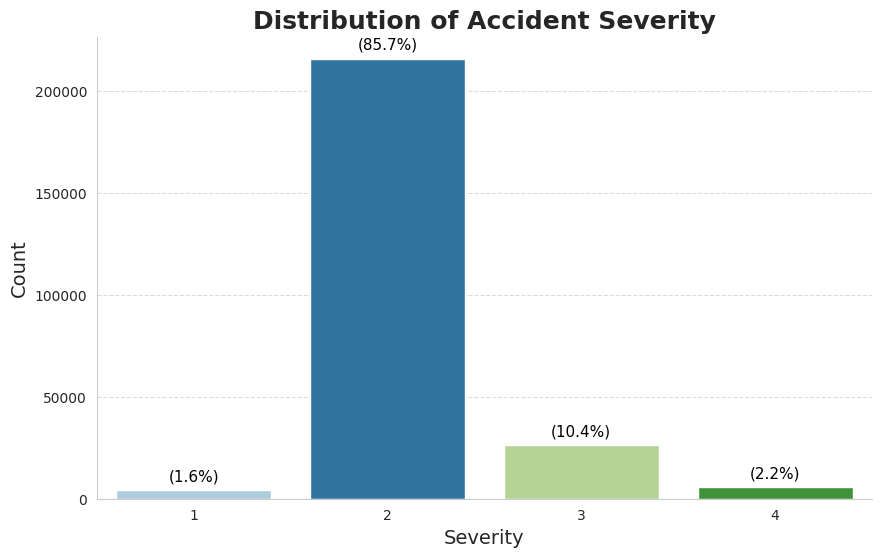

In [221]:
# Set up the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a countplot to show the distribution of accident severity with a new color theme
ax = sns.countplot(x='Severity', data=Merg2, palette='Paired')

# Annotate the bars with only percentages
total = len(Merg2)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    ax.annotate(f'({percentage})',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                textcoords='offset points')

# Add title and labels
plt.title('Distribution of Accident Severity', fontsize=18, weight='bold')
plt.xlabel('Severity', fontsize=14)
plt.ylabel('Count', fontsize=14)
# Style the grid and background for better aesthetics
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Show the plot
plt.show()

#2)What are the top 5 cities with the most accidents?

<ipython-input-187-4f9acaaafbb3>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



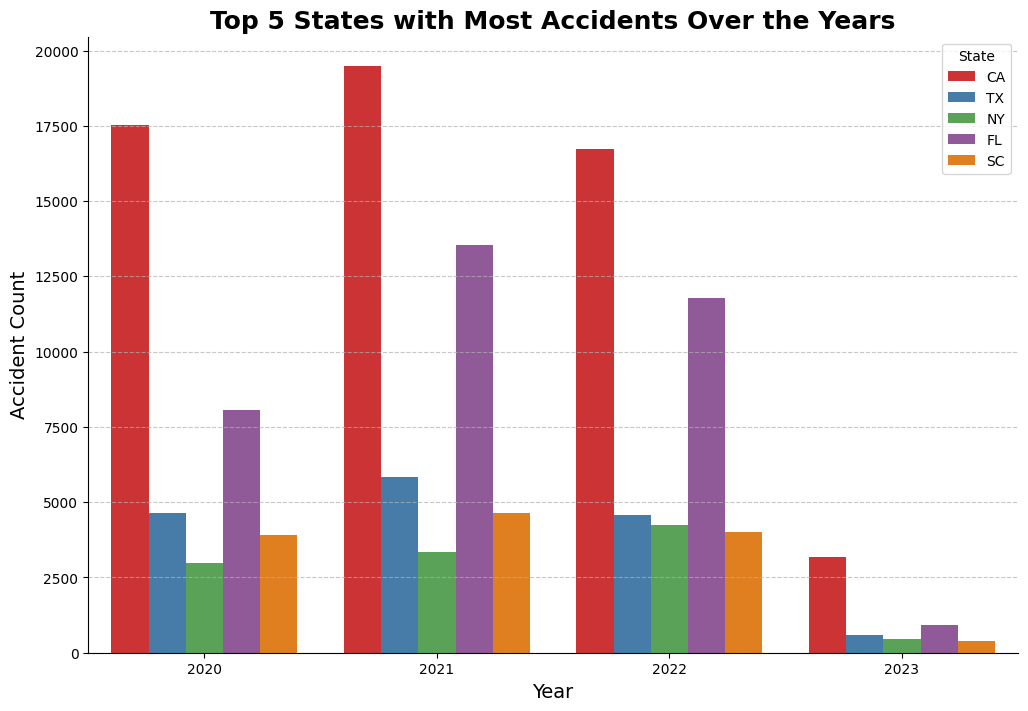

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Group data to find the top 5 states with the most accidents
top_5_states = Merg2['State'].value_counts().head(5).index

# Filter the data to include only the top 5 states
filtered_data = Merg2[Merg2['State'].isin(top_5_states)]

# Convert 'Date' column to datetime and extract the year
filtered_data['Year'] = pd.to_datetime(filtered_data['Date']).dt.year

# Set up the figure size for the plot
plt.figure(figsize=(12, 8))

# Create a countplot to show accidents over the years for the top 5 states
sns.countplot(x='Year', hue='State', data=filtered_data, palette='Set1')

# Add title and labels
plt.title('Top 5 States with Most Accidents Over the Years', fontsize=18, weight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Accident Count', fontsize=14)

# Style the grid and background for better aesthetics
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()



# 3)Distribution of Accidents Based on the time of the day

<ipython-input-196-81309a0ee529>:5: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

<ipython-input-196-81309a0ee529>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'Accident Count')

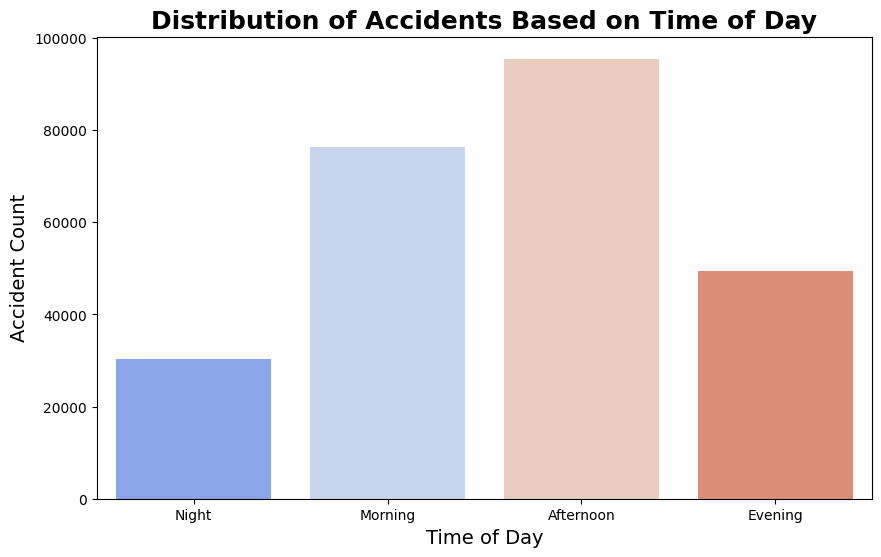

In [196]:
# Check and ensure the 'Start_Time' column is in string format first
Merg2['Start_Time'] = Merg2['Start_Time'].astype(str)

# Convert 'Start_Time' to datetime and extract the hour
Merg2['Hour'] = pd.to_datetime(Merg2['Start_Time'], errors='coerce').dt.hour

# Create time of day categories
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
Merg2['Time_of_Day'] = pd.cut(Merg2['Hour'], bins=bins, labels=labels, right=False)

# Set up the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a countplot to show the distribution of accidents based on the time of day
sns.countplot(x='Time_of_Day', data=Merg2, palette='coolwarm')

# Add title and labels
plt.title('Distribution of Accidents Based on Time of Day', fontsize=18, weight='bold')
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Accident Count', fontsize=14)

# 4)What is the monthly trend of accidents over different years?


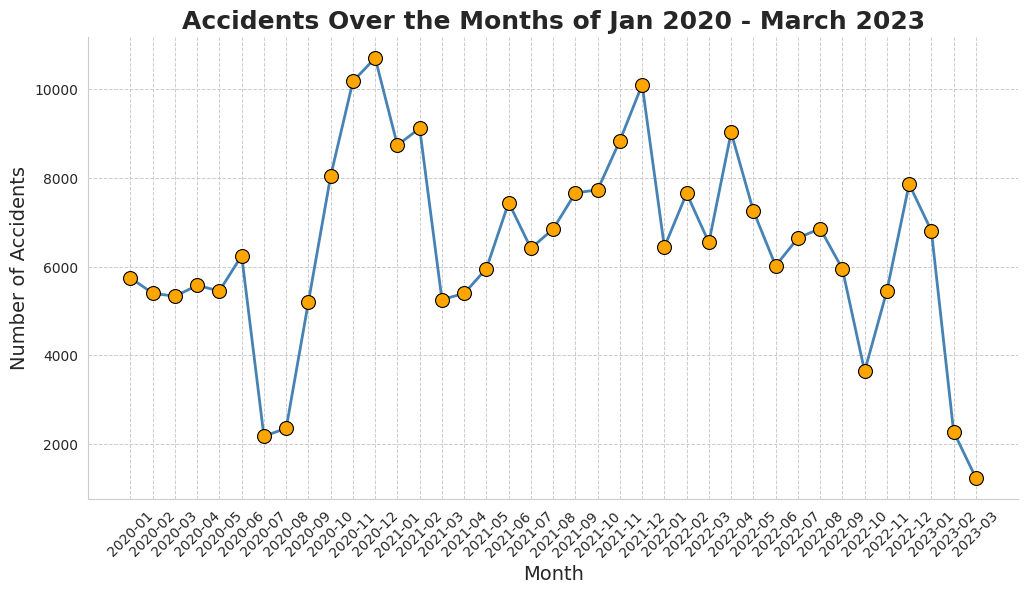

In [212]:
# Extract month and year from the 'Date' column
Merg2['Month'] = Merg2['Date'].dt.to_period('M')

# Group by 'Month' and count the number of accidents per month
accidents_per_month = Merg2.groupby('Month').size()

# Set up the figure size for the line plot
plt.figure(figsize=(12, 6))

# Create a line plot with a more visible color and smaller marker size
sns.lineplot(x=accidents_per_month.index.astype(str), y=accidents_per_month.values,
             linestyle='-', color='steelblue', linewidth=2, marker='o', markersize=6)

# Overlay the points with a distinct color and smaller size
sns.scatterplot(x=accidents_per_month.index.astype(str), y=accidents_per_month.values,
                color='orange', s=100, zorder=3, edgecolor='black')

# Add title and labels
plt.title('Accidents Over the Months of Jan 2020 - March 2023', fontsize=18, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)

# Add grid for readability
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Remove top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.show()



# 5). How does accident frequency vary by road type (amenities like Junction, Railway, etc.)?

<ipython-input-237-216e798566ed>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




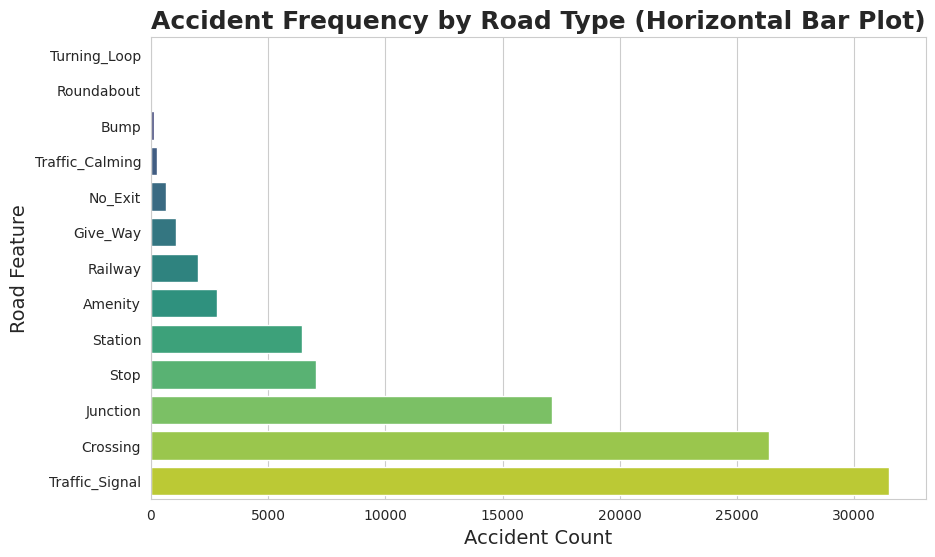

In [237]:
# Set up the figure size for the bar plot
plt.figure(figsize=(10, 6))

# Create a horizontal bar plot to show how accident frequency varies by road type, sorted in ascending order
sns.barplot(x='Count', y='Feature', data=road_feature_counts_sorted, palette='viridis')

# Add title and labels
plt.title('Accident Frequency by Road Type (Horizontal Bar Plot)', fontsize=18, weight='bold')
plt.xlabel('Accident Count', fontsize=14)
plt.ylabel('Road Feature', fontsize=14)

# Show the plot
plt.show()


# 6. How does the time taken to clear accidents vary between sunrise and sunset?

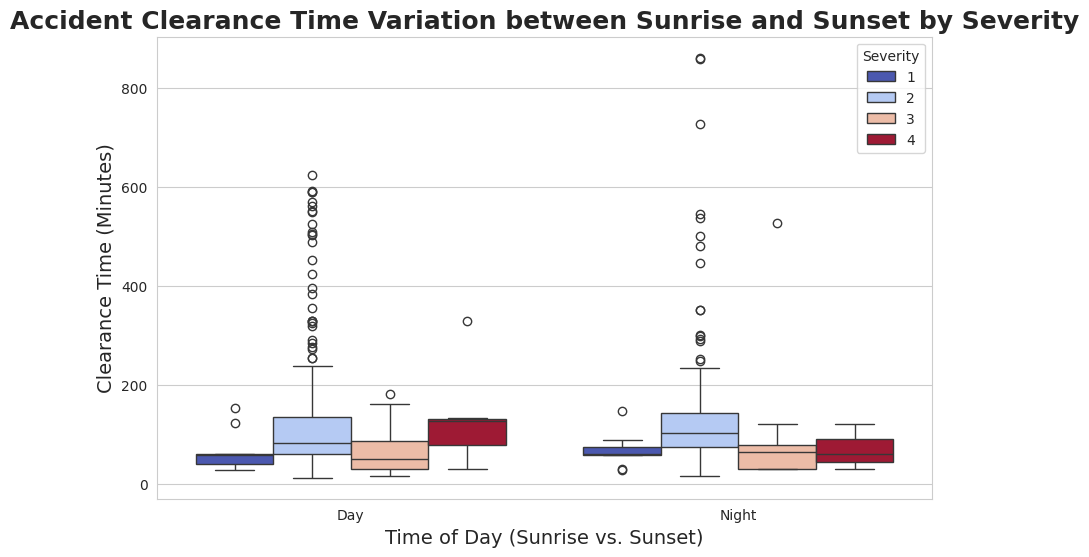

In [253]:
# Convert 'Start_Time' and 'End_Time' to datetime if they are not already in that format
Merg2['Start_Time'] = pd.to_datetime(Merg2['Start_Time'], errors='coerce')
Merg2['End_Time'] = pd.to_datetime(Merg2['End_Time'], errors='coerce')

# Create a new column for accident clearance time by calculating the difference between 'End_Time' and 'Start_Time'
Merg2['Clearance_Time'] = (Merg2['End_Time'] - Merg2['Start_Time']).dt.total_seconds() / 60  # in minutes

# Remove negative clearance times
Merg2 = Merg2[Merg2['Clearance_Time'] >= 0]

# Filter for rows with non-null values in 'Clearance_Time', 'Sunrise_Sunset', and 'Severity'
filtered_data = Merg2.dropna(subset=['Clearance_Time', 'Sunrise_Sunset', 'Severity'])

# Set up the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a box plot to show the distribution of clearance time between sunrise and sunset, with hue for severity
sns.boxplot(x='Sunrise_Sunset', y='Clearance_Time', hue='Severity', data=filtered_data, palette='coolwarm')

# Add title and labels
plt.title('Accident Clearance Time Variation between Sunrise and Sunset by Severity', fontsize=18, weight='bold')
plt.xlabel('Time of Day (Sunrise vs. Sunset)', fontsize=14)
plt.ylabel('Clearance Time (Minutes)', fontsize=14)

# Show the plot
plt.show()


# 7) What are the accident hotspots (high-frequency locations) in the dataset?

In [252]:
# Ensure the 'Date' column is in datetime format
Merg2['Date'] = pd.to_datetime(Merg2['Date'], errors='coerce')

# Filter data for accidents from 2020 to 2023 and remove rows with missing latitude/longitude
filtered_years_data = Merg2[(Merg2['Date'].dt.year >= 2020) & (Merg2['Date'].dt.year <= 2023)][['Start_Lat', 'Start_Lng']].dropna()

# Create a base map centered on the US
heatmap_map_years = folium.Map(location=[39.50, -98.35], zoom_start=4)

# Convert the data to a list of lists in the format [[lat, lng], [lat, lng], ...]
heat_data_years = [[row['Start_Lat'], row['Start_Lng']] for index, row in filtered_years_data.iterrows()]

# Add the heatmap to the base map for accidents from 2020 to 2023
HeatMap(heat_data_years, radius=8, blur=10, max_zoom=1).add_to(heatmap_map_years)

# Save the map as an HTML file (optional) or display it in the notebook
heatmap_map_years.save("us_accidents_heatmap_2020_2023.html")
heatmap_map_years


# 8). What is the correlation between temperature and accident severity?

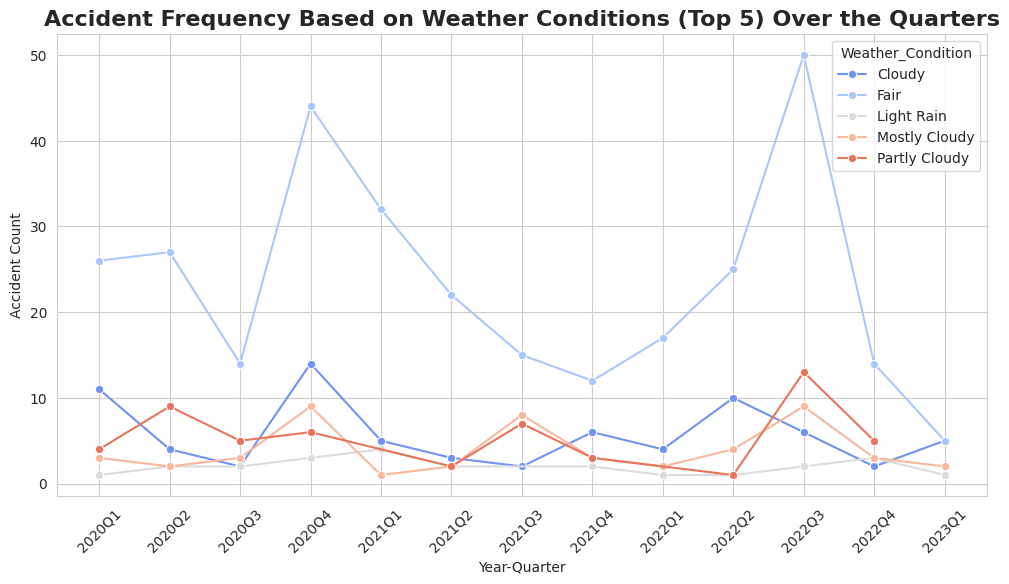

In [270]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filter data to remove null values for 'Weather_Condition' and 'Date'
filtered_data = Merg2.dropna(subset=['Weather_Condition', 'Date'])

# Convert 'Date' column to datetime if not already
filtered_data['Date'] = pd.to_datetime(filtered_data['Date'], errors='coerce')

# Extract year-quarter for grouping and convert it to string format
filtered_data['Quarter'] = filtered_data['Date'].dt.to_period('Q').astype(str)

# Find top 5 most frequent weather conditions
top_weather_conditions = filtered_data['Weather_Condition'].value_counts().head(5).index

# Filter data for the top 5 weather conditions
filtered_data_top_conditions = filtered_data[filtered_data['Weather_Condition'].isin(top_weather_conditions)]

# Group by weather condition and quarter, and count the number of accidents
quarterly_accidents_by_weather = filtered_data_top_conditions.groupby(['Quarter', 'Weather_Condition']).size().reset_index(name='Accident_Count')

# Set up the figure size for the line plot
plt.figure(figsize=(12, 6))

# Create a line plot to show accident frequency based on weather conditions over the quarters
sns.lineplot(x='Quarter', y='Accident_Count', hue='Weather_Condition', data=quarterly_accidents_by_weather, marker='o', palette='coolwarm')

# Add title and labels
plt.title('Accident Frequency Based on Weather Conditions (Top 5) Over the Quarters', fontsize=16, weight='bold')
plt.xlabel('Year-Quarter')
plt.ylabel('Accident Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()



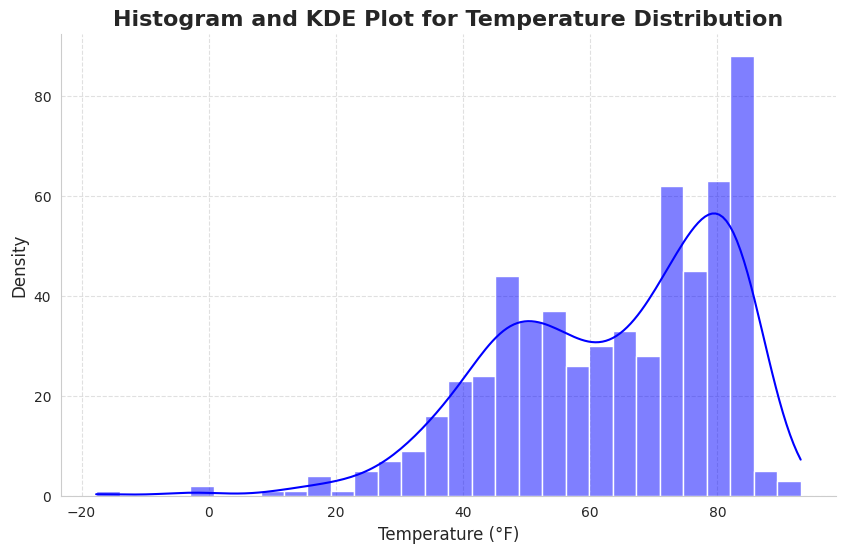

In [296]:
# Filter the data to remove null values for 'Temperature(F)'
filtered_data = Merg2.dropna(subset=['Temperature(F)'])

# Set up the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a histogram with KDE plot for Temperature
sns.histplot(data=filtered_data, x='Temperature(F)', kde=True, color='blue', bins=30)

# Add title and labels for Temperature
plt.title('Histogram and KDE Plot for Temperature Distribution', fontsize=16, weight='bold')
plt.xlabel('Temperature (°F)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Customize the grid and style
sns.despine()  # Removes the top and right spines
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

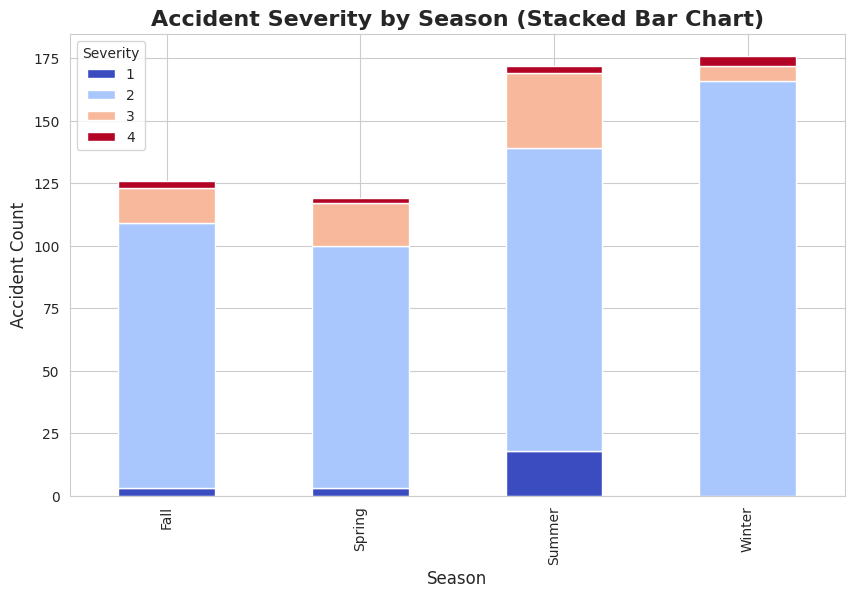

In [285]:
# Define a function to assign seasons based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Add 'Month' column from 'Date'
Merg2['Month'] = pd.to_datetime(Merg2['Date'], errors='coerce').dt.month

# Create a 'Season' column
Merg2['Season'] = Merg2['Month'].apply(get_season)

# Filter data to remove null values in Severity and Season
filtered_data = Merg2.dropna(subset=['Severity', 'Season'])

### 1. Pie Chart for Accident Severity Distribution by Season ###
# Group by season and severity, and calculate the count
severity_by_season = filtered_data.groupby('Season')['Severity'].count()

# Group data by season and severity
severity_season_group = filtered_data.groupby(['Season', 'Severity']).size().unstack()

# Plot a stacked bar chart
severity_season_group.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')

# Add title and labels
plt.title('Accident Severity by Season (Stacked Bar Chart)', fontsize=16, weight='bold')
plt.xlabel('Season', fontsize=12)
plt.ylabel('Accident Count', fontsize=12)

plt.show()



In [278]:
# Convert 'Date' column to datetime format
Merg2['Date'] = pd.to_datetime(Merg2['Date'], errors='coerce')

# Add a column for the day of the week
Merg2['Day_of_Week'] = Merg2['Date'].dt.dayofweek

# Create a new column to categorize weekdays (0-4) and weekends (5-6)
Merg2['Day_Type'] = Merg2['Day_of_Week'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

# Filter data to remove null values for severity and day type
filtered_data = Merg2.dropna(subset=['Severity', 'Day_Type'])


<ipython-input-283-75ce4b6a576b>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




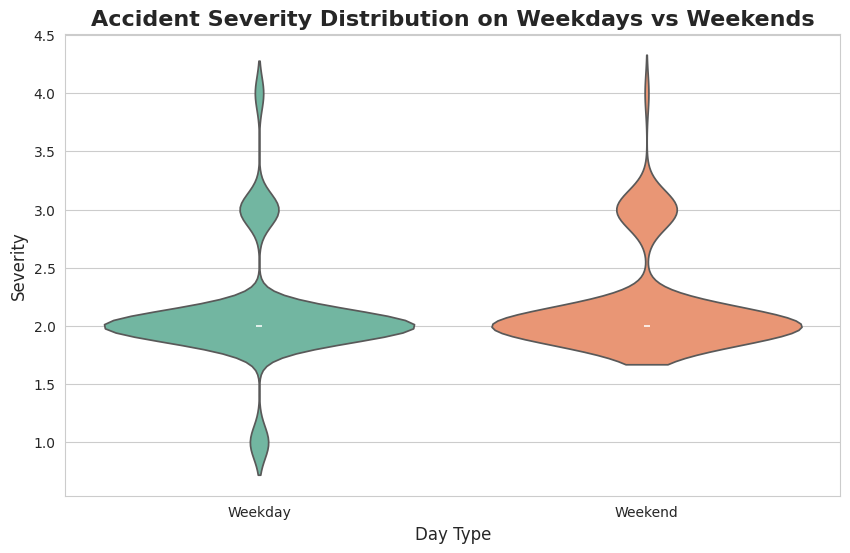

In [283]:
# Set up the figure size
plt.figure(figsize=(10, 6))

# Create a violin plot to show the distribution of severity on weekdays vs weekends
sns.violinplot(x='Day_Type', y='Severity', data=filtered_data, palette='Set2')


plt.title('Accident Severity Distribution on Weekdays vs Weekends', fontsize=16, weight='bold')
plt.xlabel('Day Type', fontsize=12)
plt.ylabel('Severity', fontsize=12)

plt.show()


In [300]:
Merg2.head()

,Severity,Date,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,City,County,...,Turning_Loop,Sunrise_Sunset,Hour,Time_of_Day,Year,Month,Clearance_Time,Season,Day_of_Week,Day_Type
252746,2,2020-01-03,2024-09-16 08:52:05,2024-09-16 09:51:47,42.821289,-74.197983,0.0,Right hand shoulder blocked due to accident on...,Pattersonville,Schenectady,...,False,Day,8,Morning,2020,1,59.700000,Winter,4,Weekday
252747,3,2020-01-04,2024-09-16 08:00:21,2024-09-16 08:44:58,39.021610,-76.940407,0.0,Left hand shoulder blocked and left lane block...,Hyattsville,Prince George's,...,False,Day,8,Morning,2020,1,44.616667,Winter,5,Weekend
252748,2,2020-01-05,2024-09-16 12:53:00,2024-09-16 13:33:38,38.538957,-121.736787,0.0,At Richards Blvd - Accident.,Davis,Yolo,...,False,Day,12,Afternoon,2020,1,40.633333,Winter,6,Weekend
252749,2,2020-01-05,2024-09-16 21:25:00,2024-09-16 22:16:37,34.426715,-117.380183,0.0,At I-15/Barstow Fwy/Historic Route 66 - Accident.,Hesperia,San Bernardino,...,False,Night,21,Evening,2020,1,51.616667,Winter,6,Weekend
252750,2,2020-01-07,2024-09-16 07:54:00,2024-09-16 08:28:38,34.516618,-117.320619,0.0,At I-15-BL/CA-18/Palmdale Rd - Accident.,Victorville,San Bernardino,...,False,Day,7,Morning,2020,1,34.633333,Winter,1,Weekday
